## Project 1 pilot study

In [687]:
# load all the packages and libraries going to be used
%pylab inline
from mvpa2.suite import *
import os.path as op
import sklearn
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [688]:
# First, let's load fMRI data
bold_fname = ('test.2.nii','test.4.nii','test.6.nii','test.8.nii')

chunks = np.zeros (320)
chunks[:80]=1
chunks[80:160]=2
chunks[160:240]=3
chunks[240:320]=4

ds= fmri_dataset(bold_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature are there;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 152256
data_info= (320, 152256)


In [689]:
# Load in the mask of the ROI
mask_fname=('masktest.nii')# right IPS
ds = fmri_dataset (bold_fname, mask=mask_fname)
print 'sample_number=',len(ds)  # check how many samples or volumes;
print'feature_number=',ds.nfeatures # check how many feature being used;
print'data_info=',ds.shape # check teh 2-dimensianl dataset info;

sample_number= 320
feature_number= 92
data_info= (320, 92)


In [690]:
# explore the dataset attributes
print 'TR_index=', ds.sa.time_indices[:5]
print 'Actual time of TR=', ds.sa.time_coords[:5]
print 'ori_voxel_feature=', ds.fa.voxel_indices[:5] # The first five feature, we can see the spatial info is preseverd!
print 'voxel_size=', ds.a.voxel_eldim
print 'volumes_dim=', ds.a.voxel_dim

TR_index= [0 1 2 3 4]
Actual time of TR= [0. 2. 4. 6. 8.]
ori_voxel_feature= [[31 44 35]
 [31 45 35]
 [31 46 32]
 [32 44 31]
 [32 44 34]]
voxel_size= (3.125, 3.125, 3.125)
volumes_dim= (52, 61, 48)


In [691]:
ds.a.mapper # Since the the most important feature of this toolbox is everything
            # can be reversed back. why? Becaused everything has been recored! How cool 
            # is that!
# stripped = ds.copy(deep=False, sa=['time_coords'],fa=[],a=[])
# Print stripped
# Having all these attributes being part of a dataset is often a useful thing to have, but in some cases (e.g. when it
# comes to efficiency, and/or very large datasets) one might want to have a leaner dataset with just the information
# that is really necessary. One way to achieve this, is to strip all unwanted attributes. The Dataset class’ copy()
# method can help with that.

ChainMapper(nodes=[FlattenMapper(shape=(52, 61, 48), auto_train=True, space='voxel_indices'), StaticFeatureSelection(dshape=(152256,), slicearg=array([False, False, False, ..., False, False, False]))])

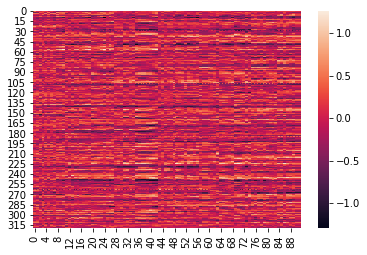

In [692]:
np.mean(ds)
sns.heatmap(ds)

In [693]:
# Load in the condition label file
conditions=np.loadtxt('test.csv',delimiter=',')
# cond_labels_shifted = np.zeros(cond_labels.shape)
# cond_labels_shifted[2:] = cond_labels[:-2]
# return cond_labels_shifted

In [694]:
ds = fmri_dataset (bold_fname, mask=mask_fname, targets= conditions, chunks=chunks)
print ds.summary()

Dataset: 320x92@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=1.20251e-05 std=0.325821 var=0.10616 min=-1.29398 max=1.26347

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table f

In [695]:
from mpl_toolkits import mplot3d

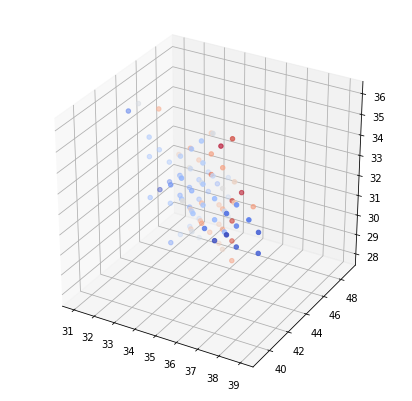

In [696]:
fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter3D(x,y,z, c= np.ravel(ds[0,:]),cmap='coolwarm') #ravel to conpress
# Good demonstration that spatial info can be preserved

1 = words

2 = faces

3 = tools/shapes

4 = numbers

In [697]:
words = ds.targets == 1
faces = ds.targets == 2
shapes = ds.targets == 3
numbers = ds.targets == 4

In [698]:
words_allpics = ds[words,:]
faces_allpics = ds[faces,:]
shapes_allpics = ds[shapes,:]
numbers_allpics = ds[numbers,:]
words_mean = np.mean(words_allpics,axis=0)
faces_mean = np.mean(faces_allpics,axis=0)
shapes_mean = np.mean(shapes_allpics,axis=0)
numbers_mean = np.mean(numbers_allpics,axis=0)

Text(0.5,0,'z')

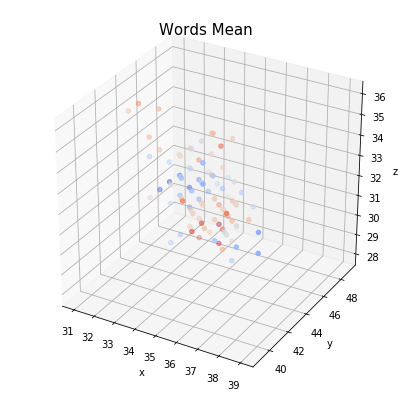

In [699]:
fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection='3d')
vol=ds.fa.voxel_indices
x = vol[:,0]
y = vol[:,1]
z = vol[:,2]
ax.scatter3D(x,y,z, c= np.ravel(words_mean),cmap='coolwarm')
ax.set_title ('Words Mean',fontsize=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

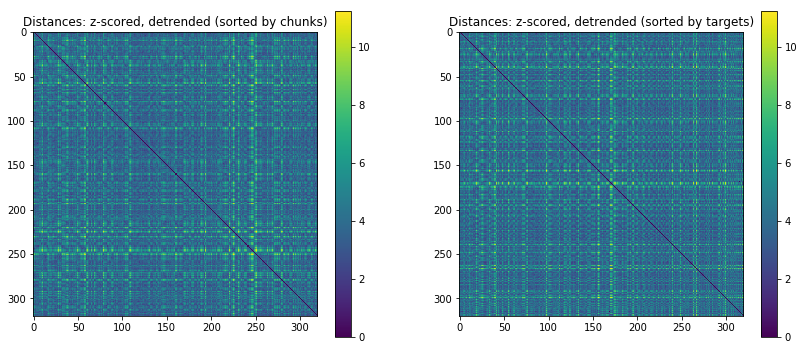

In [700]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [701]:
#preprocessing
poly_detrend(ds, polyord=1, chunks_attr='chunks')
zscore(ds, param_est=('targets', [0]))
ds = ds[ds.sa.targets != 0]

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

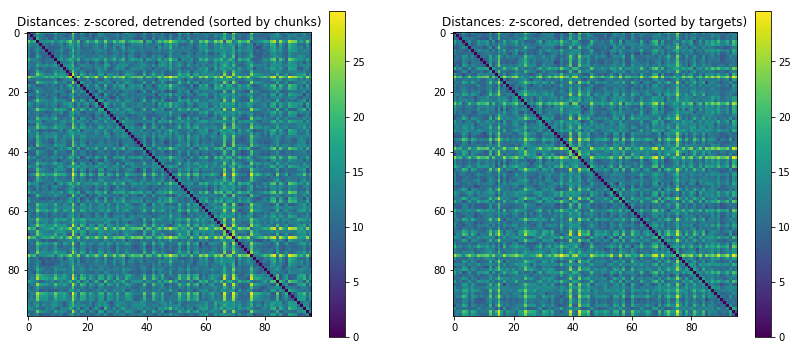

In [702]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [703]:
clf = kNN(k=5, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results = cvte(ds)
print 'Mean accuracy=', np.mean(cv_results)

Mean accuracy= 0.2604166666666667


In [704]:
print 'Accuracy for each run=', cv_results.samples

Accuracy for each run= [[0.29166667]
 [0.20833333]
 [0.25      ]
 [0.29166667]]


In [705]:
from scipy import stats

In [706]:
# test the significance

t, p = stats.ttest_1samp(cv_results,.25)
print 't_value=', t
print 'p_value=', p

t_value= [0.52223297]
p_value= [0.63761809]


## Define the function to capture the spreadness of our data. $R^2$

In [707]:
ds = fmri_dataset(bold_fname, mask=mask_fname, targets=conditions, chunks=chunks)
print ds.summary()

Dataset: 320x92@float32, <sa: chunks,targets,time_coords,time_indices>, <fa: voxel_indices>, <a: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>
stats: mean=1.20251e-05 std=0.325821 var=0.10616 min=-1.29398 max=1.26347

Counts of targets in each chunk:
  chunks\targets 0.0 1.0 2.0 3.0 4.0
                 --- --- --- --- ---
       1.0        56  6   6   6   6
       2.0        56  6   6   6   6
       3.0        56  6   6   6   6
       4.0        56  6   6   6   6

Summary for targets across chunks
  targets mean std min max #chunks
    0      56   0   56  56    4
    1       6   0   6   6     4
    2       6   0   6   6     4
    3       6   0   6   6     4
    4       6   0   6   6     4

Summary for chunks across targets
  chunks mean std min max #targets
    1     16   20  6   56     5
    2     16   20  6   56     5
    3     16   20  6   56     5
    4     16   20  6   56     5
Sequence statistics for 320 entries from set [0.0, 1.0, 2.0, 3.0, 4.0]
Counter-balance table f

In [708]:
def cal_R_sq (v_i,x_i,y_i,z_i):
    """Define the function that is gonna be used for the feature extration"""
    x_c = sum(np.abs(v_i)*x_i)/sum(np.abs(v_i))
    y_c = sum(np.abs(v_i)*y_i)/sum(np.abs(v_i))
    z_c = sum(np.abs(v_i)*z_i)/sum(np.abs(v_i))
    R_2 = sum(((x_i-x_c)**2+(y_i-y_c)**2)*np.abs(v_i))/sum(np.abs(v_i))
    return R_2

Text(0.5,1,'The Differnce Among Different TRs')

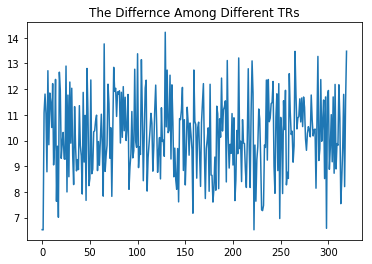

In [709]:
# loop over all the pictures 
results = []
for i in range(len(ds[:,])):
    v_i = ds[i,:]
    vol=ds.fa.voxel_indices
    x_i= vol[:,0]
    y_i= vol[:,1]
    z_i= vol[:,2]
    results.append (cal_R_sq (v_i,x_i,y_i,z_i))
plt.plot(results)
plt.title('The Differnce Among Different TRs')
# This is what we want to put the feature in!

In [710]:
new_feature=np.asarray(results).reshape(len(ds[:,]),1)
new_data=np.hstack([ds, new_feature])
new_data.shape

(320, 93)

In [711]:
# Create a new dataset after adding in the additional label
ds_new = dataset_wizard(new_data, targets=conditions, chunks=chunks)

Text(0.5,1,'Distances: z-scored, detrended (sorted by targets)')

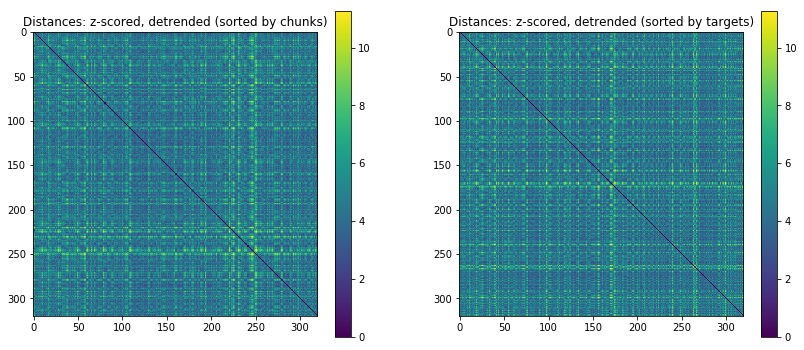

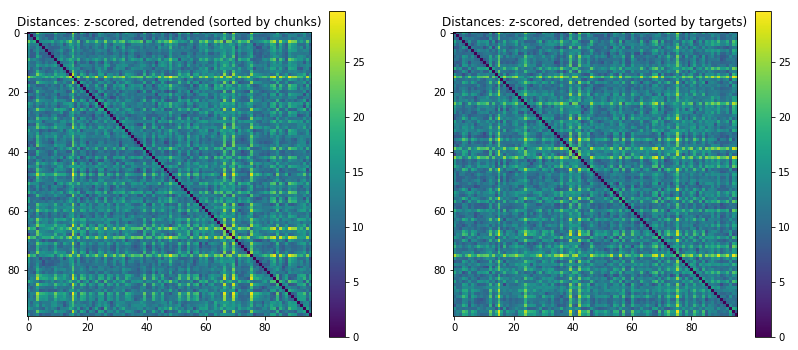

In [712]:
pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

#preprocessing on the dataset with new features
poly_detrend(ds_new, polyord=1, chunks_attr='chunks')
zscore(ds_new, param_est=('targets', [0]))
ds_new = ds_new[ds_new.sa.targets != 0]

pl.figure(figsize=(14, 6))
pl.subplot(121)
plot_samples_distance(ds_new, sortbyattr='chunks')
pl.title('Distances: z-scored, detrended (sorted by chunks)')
pl.subplot(122)
plot_samples_distance(ds_new, sortbyattr='targets')
pl.title('Distances: z-scored, detrended (sorted by targets)')

In [713]:
# Classification based on new feature added
clf = kNN(k=5, dfx=one_minus_correlation, voting='majority')
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_new_results = cvte(ds_new)
print 'Mean Accuracy=', np.mean(cv_new_results)
print 'Accuracy for each run=', cv_new_results.samples

Mean Accuracy= 0.25
Accuracy for each run= [[0.25      ]
 [0.20833333]
 [0.25      ]
 [0.29166667]]


In [714]:
# Test the results significance
t_new, p_new = stats.ttest_1samp(cv_new_results,.25)
print 't_new_value=', t_new
print 'p_new_value=', p_new

t_new_value= [0.]
p_new_value= [1.]


In [715]:
# Try different classifers
clf = LinearCSVMC()
cvte = CrossValidation(clf, NFoldPartitioner(),errorfx=lambda p, t: np.mean(p == t))
cv_results_svm= cvte(ds_new)
np.mean(cv_results_svm)

0.24999999999999997

In [716]:
# Test the results significance
t_new_svm, p_new_svm= stats.ttest_1samp(cv_new_results,.25)
print 't_new_value_svm=', t_new_svm
print 'p_new_value_svm=', p_new_svm

t_new_value_svm= [0.]
p_new_value_svm= [1.]


In [717]:
# a= fmri_dataset('IPS_mask.nii')
# a.samples[:,a.fa['voxel_indices'][:,0] < 25] = 0
# nimg = map2nifti(a)
#nimg.to_filename('masktest.nii')